In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [109]:
english_df = pd.read_csv('../data/2023/english.csv')
not_english_df = pd.read_csv('../data/2023/not_english.csv')
uk_df = pd.read_csv('../data/2023/uk.csv')

C:\Users\pm_\AppData\Local\Temp\ipykernel_18732\2525348955.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  english_df = pd.read_csv('data/2023/english.csv')
C:\Users\pm_\AppData\Local\Temp\ipykernel_18732\2525348955.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  not_english_df = pd.read_csv('data/2023/not_english.csv')


In [110]:
# df['Region'].value_counts()

In [111]:
# english_df = df[df['Region']=='English']
# not_english_df = df[df['Region']=='Non-English']

In [112]:
not_english_df.head()

,UKPRN,Provider name,Level of study,Subject code,Subject,Question,Responses,Population,Option 1,Option 2,Option 3,Option 4,Option 5,Positivity,Response Rate,Question Num,index1
0,NI,Northern Ireland,All undergraduates,CAH01-01-02,Medicine (non-specific),How good are teaching staff at explaining thi...,236.0,285.0,59.0,153.0,18.0,6.0,NaN,89.8,83.2,Q01,25936
1,NI,Northern Ireland,All undergraduates,CAH01-01-02,Medicine (non-specific),How often do teaching staff make the subject ...,236.0,285.0,49.0,148.0,34.0,5.0,NaN,83.5,83.2,Q02,25937
2,NI,Northern Ireland,All undergraduates,CAH01-01-02,Medicine (non-specific),How often is the course intellectually stimul...,236.0,285.0,152.0,77.0,6.0,1.0,NaN,97.0,83.2,Q03,25938
3,NI,Northern Ireland,All undergraduates,CAH01-01-02,Medicine (non-specific),How often does your course challenge you to a...,236.0,285.0,109.0,100.0,25.0,2.0,NaN,88.6,83.2,Q04,25939
4,NI,Northern Ireland,All undergraduates,CAH01-01-02,Medicine (non-specific),To what extent have you had the chance to exp...,234.0,285.0,92.0,108.0,29.0,5.0,NaN,85.5,83.2,Q05,25940


In [113]:
print(uk_df.shape)
print(not_english_df.shape)
print(english_df.shape)

(15938, 17)
(78111, 17)
(294732, 17)


In [129]:
print('# Surveys')
print(15938/26)
print(78111/27)
print(294732/27)

613.0
2893.0
10916.0


In [131]:
print('# Providers')
print(len(uk_df['Provider name'].unique()))
print(len(not_english_df['Provider name'].unique()))
print(len(english_df['Provider name'].unique()))

# Providers
16
49
366


In [132]:
print('# Subjects')
print(len(uk_df['Subject code'].unique()))
print(len(not_english_df['Subject code'].unique()))
print(len(english_df['Subject code'].unique()))

# Subjects
164
144
160


In [134]:
print('% Avg RespRate')
print(uk_df['Response Rate'].mean())
print(not_english_df['Response Rate'].mean())
print(english_df['Response Rate'].mean())

% Avg RespRate
73.39184339314846
75.11119944694089
75.87350677903991


In [135]:
print('% Avg Positivity')
print(uk_df['Positivity'].mean())
print(not_english_df['Positivity'].mean())
print(english_df['Positivity'].mean())

% Avg Positivity
80.51388505458652
80.2184570675065
80.48159989414111


In [114]:
# not_english_df['Qn'] = not_english_df['Question Num'].str[1:]
# english_df['Qn'] = english_df['Question Num'].str[1:]

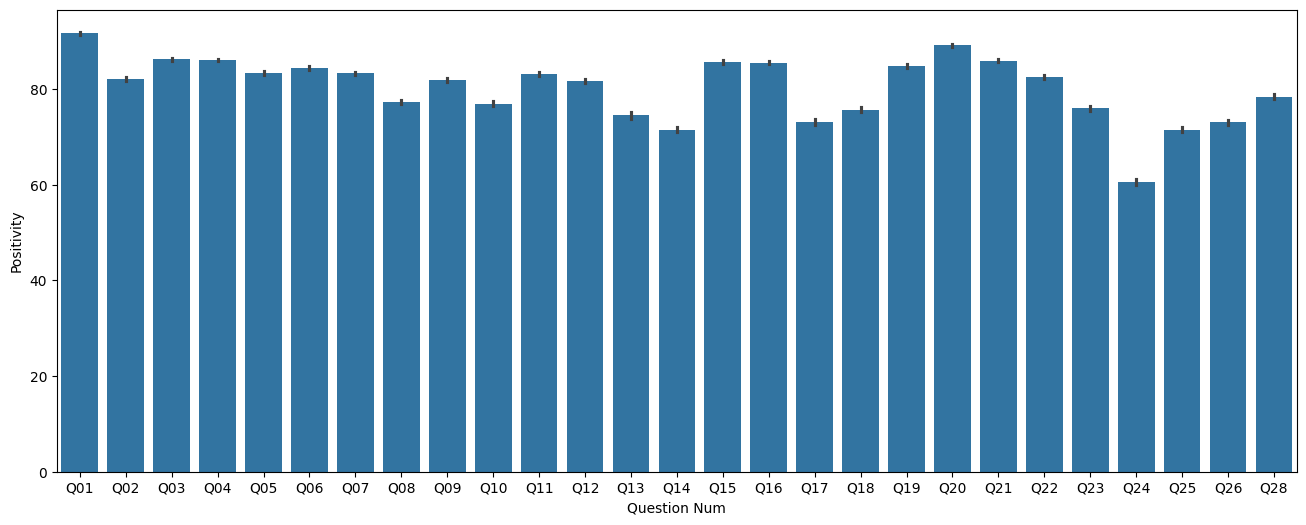

In [138]:
fig = plt.figure(figsize=(16, 6))
sns.barplot(not_english_df, x='Question Num', y='Positivity')
plt.show()

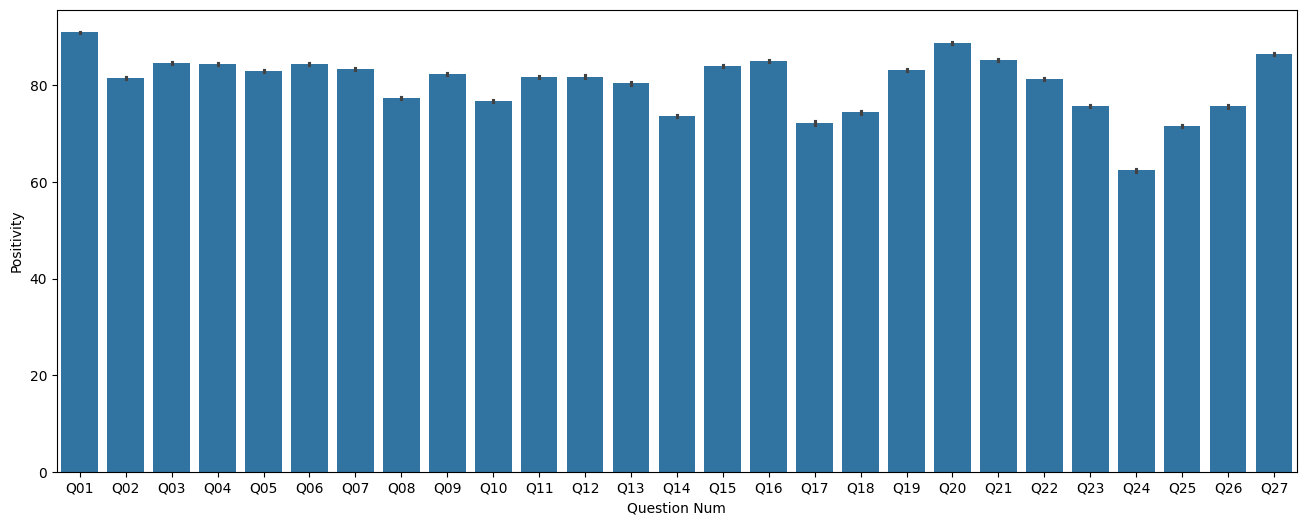

In [139]:
fig = plt.figure(figsize=(16, 6))
sns.barplot(english_df, x='Question Num', y='Positivity')
plt.show()

In [143]:
english_df.loc[:, 'Region'] = ['English']*len(english_df['Option 1'].values)
not_english_df.loc[:, 'Region'] = ['Non-English']*len(not_english_df['Option 1'].values)
uk_df.loc[:, 'Region'] = ['UK']*len(uk_df['Option 1'].values)

In [144]:
combined = pd.concat([not_english_df, english_df])
combined.head()

,UKPRN,Provider name,Level of study,Subject code,Subject,Question,Responses,Population,Option 1,Option 2,Option 3,Option 4,Option 5,Positivity,Response Rate,Question Num,index1,Region
0,NI,Northern Ireland,All undergraduates,CAH01-01-02,Medicine (non-specific),How good are teaching staff at explaining thi...,236.0,285.0,59.0,153.0,18.0,6.0,NaN,89.8,83.2,Q01,25936,Non-English
1,NI,Northern Ireland,All undergraduates,CAH01-01-02,Medicine (non-specific),How often do teaching staff make the subject ...,236.0,285.0,49.0,148.0,34.0,5.0,NaN,83.5,83.2,Q02,25937,Non-English
2,NI,Northern Ireland,All undergraduates,CAH01-01-02,Medicine (non-specific),How often is the course intellectually stimul...,236.0,285.0,152.0,77.0,6.0,1.0,NaN,97.0,83.2,Q03,25938,Non-English
3,NI,Northern Ireland,All undergraduates,CAH01-01-02,Medicine (non-specific),How often does your course challenge you to a...,236.0,285.0,109.0,100.0,25.0,2.0,NaN,88.6,83.2,Q04,25939,Non-English
4,NI,Northern Ireland,All undergraduates,CAH01-01-02,Medicine (non-specific),To what extent have you had the chance to exp...,234.0,285.0,92.0,108.0,29.0,5.0,NaN,85.5,83.2,Q05,25940,Non-English


In [157]:
till_13 = combined[combined['Question Num'].isin(['Q01', 'Q02', 'Q03',  'Q04',  'Q05',  'Q06',  'Q07',  'Q08',  'Q09',  'Q10',  'Q11', 'Q12', 'Q13'])]
after_13 = combined[~combined['Question Num'].isin(['Q01', 'Q02', 'Q03',  'Q04',  'Q05',  'Q06',  'Q07',  'Q08',  'Q09',  'Q10',  'Q11', 'Q12', 'Q13', 'Q27', 'Q28'])]

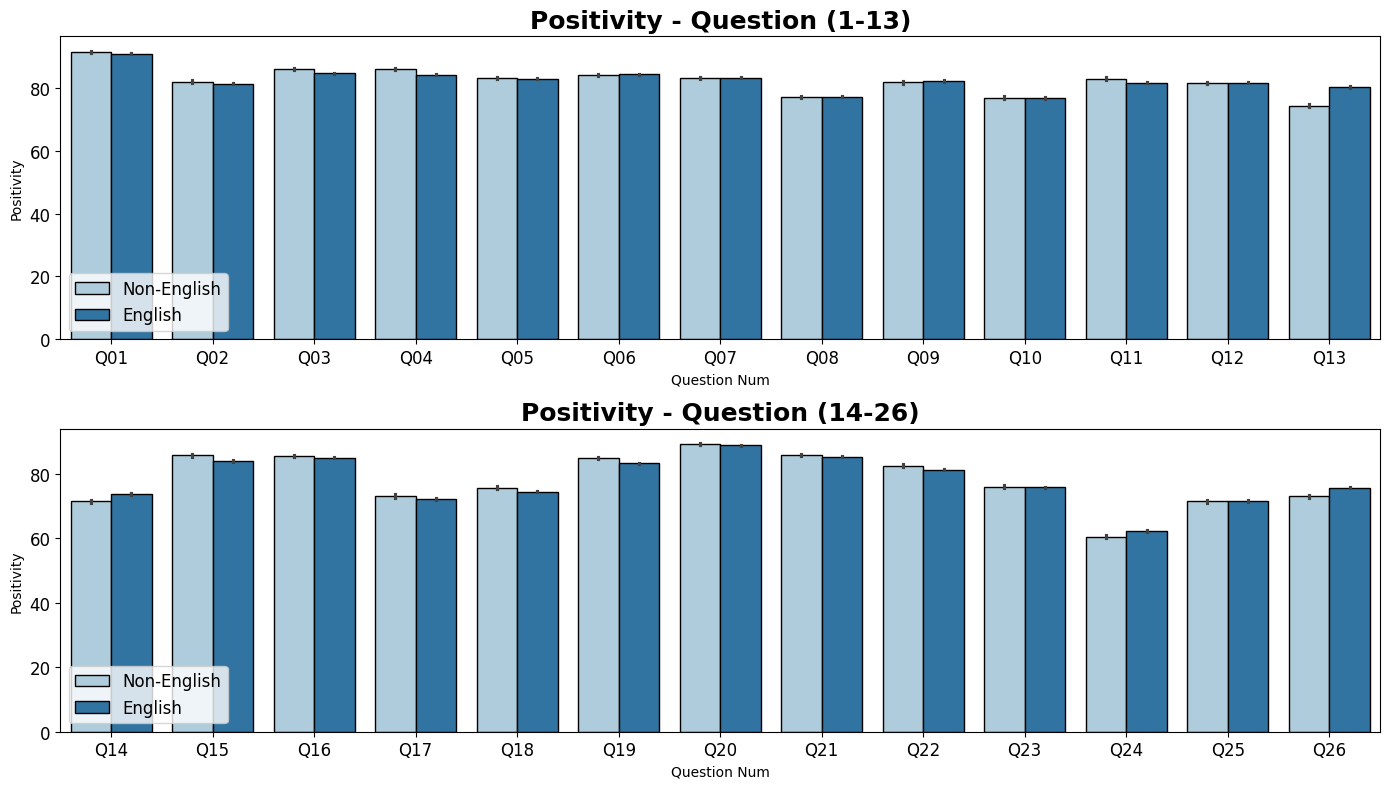

In [199]:
# Create a figure with a grid of 1 row and 2 columns
fig, axes = plt.subplots(2, 1, figsize=(14, 8))  # Adjust figsize as needed

# Plot 1: Actual vs Predicted for Training Data
sns.barplot(till_13, x='Question Num', y='Positivity', hue='Region', palette='Paired', edgecolor='black', ax=axes[0])
# axes[0].plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', label='Ideal Fit')
# axes[0].set_xlabel('Actual Values', fontsize=15)
# axes[0].set_ylabel('Predicted Values', fontsize=15)
# axes[0].set_yticks(fontsize=15)
# axes[0].set_xticks(fontsize=15)
axes[0].tick_params(axis='both', labelsize=12)
axes[0].set_title('Positivity - Question (1-13)', fontsize=18, weight='bold')
axes[0].legend(fontsize=12)
# axes[0].grid(True)

# Plot 1: Actual vs Predicted for Training Data
sns.barplot(after_13, x='Question Num', y='Positivity', hue='Region', palette='Paired', edgecolor='black', ax=axes[1])
# palette=["#d888ef", "#aef6a6"]
# palette=["#f6d7ff", "#dbffd7"]
# axes[1].plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', label='Ideal Fit')
# axes[1].set_xlabel('Actual Values', fontsize=15)
# axes[1].set_ylabel('Predicted Values', fontsize=15)
# axes[1].set_yticks(fontsize=15)
# axes[1].set_xticks(fontsize=15)
axes[1].tick_params(axis='both', labelsize=12)
axes[1].set_title('Positivity - Question (14-26)', fontsize=18, weight='bold')
axes[1].legend(fontsize=12)
# axes[1].grid(True)

# Plot 1: Actual vs Predicted for Training Data
# sns.heatmap(uk_new.corr(), annot=True, ax=axes[2])
# # axes[1].plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', label='Ideal Fit')
# # axes[1].set_xlabel('Actual Values', fontsize=15)
# # axes[1].set_ylabel('Predicted Values', fontsize=15)
# # axes[1].set_yticks(fontsize=15)
# # axes[1].set_xticks(fontsize=15)
# axes[2].tick_params(axis='both', labelsize=12)
# axes[2].set_title('Correlation Matrix - UK', fontsize=18, weight='bold')
# axes[2].legend(fontsize=12)
# axes[1].grid(True)

# Adjust the layout
plt.tight_layout()

# Show the combined plot
plt.show()

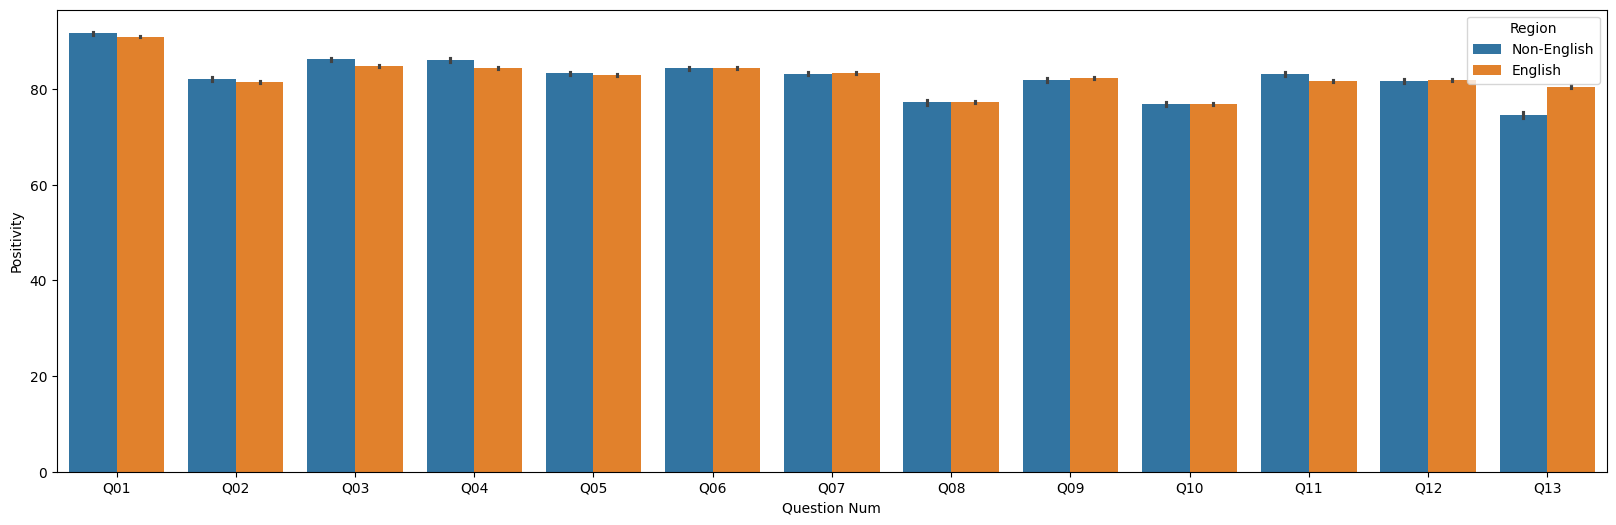

In [158]:
fig = plt.figure(figsize=(20, 6))
sns.barplot(till_13, x='Question Num', y='Positivity', hue='Region')
plt.show()

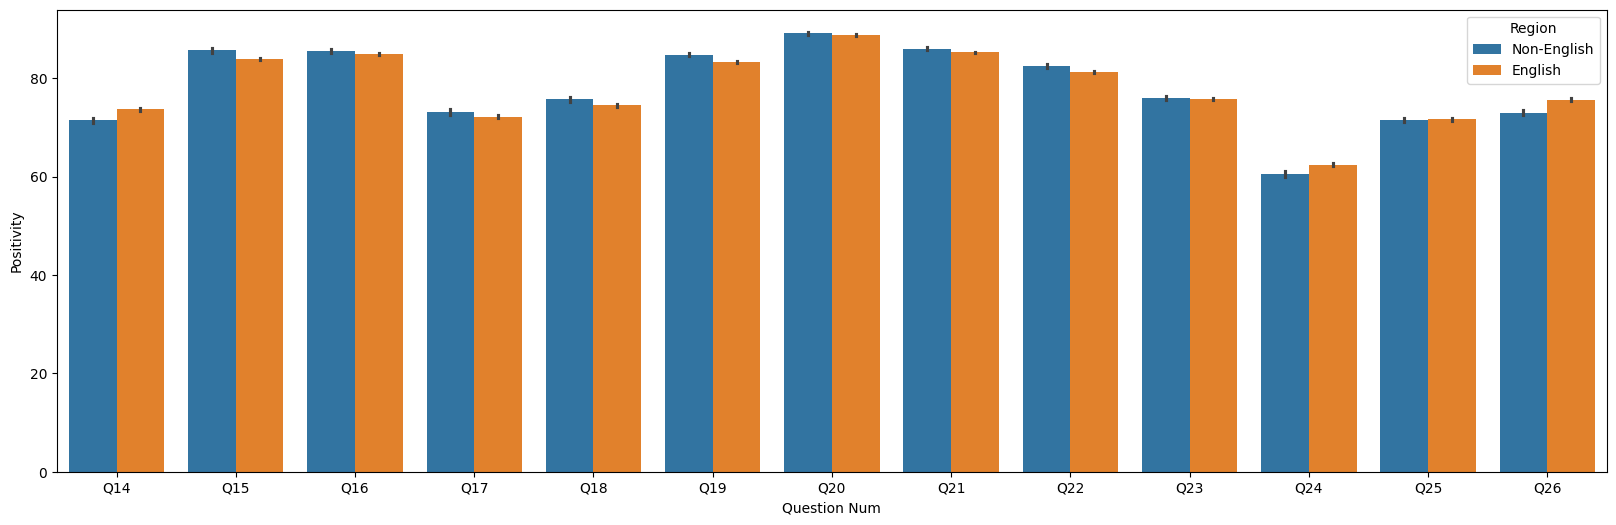

In [159]:
fig = plt.figure(figsize=(20, 6))
sns.barplot(after_13, x='Question Num', y='Positivity', hue='Region')
plt.show()

In [145]:
combined['Region'].value_counts()

Region
English        294732
Non-English     78111
Name: count, dtype: int64

In [115]:
# ne_new = pd.get_dummies(not_english_df[['Qn', 'Option 1', 'Option 2', 'Option 3', 'Option 4']], prefix=['N'], dtype=float)
ne_new = not_english_df[['Positivity', 'Option 1', 'Option 2', 'Option 3', 'Option 4']]
e_new = english_df[['Positivity', 'Option 1', 'Option 2', 'Option 3', 'Option 4']]
uk_new = uk_df[['Positivity', 'Option 1', 'Option 2', 'Option 3', 'Option 4']]

C:\Users\pm_\AppData\Local\Temp\ipykernel_18732\2783081273.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[0].legend(fontsize=12)
C:\Users\pm_\AppData\Local\Temp\ipykernel_18732\2783081273.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[1].legend(fontsize=12)


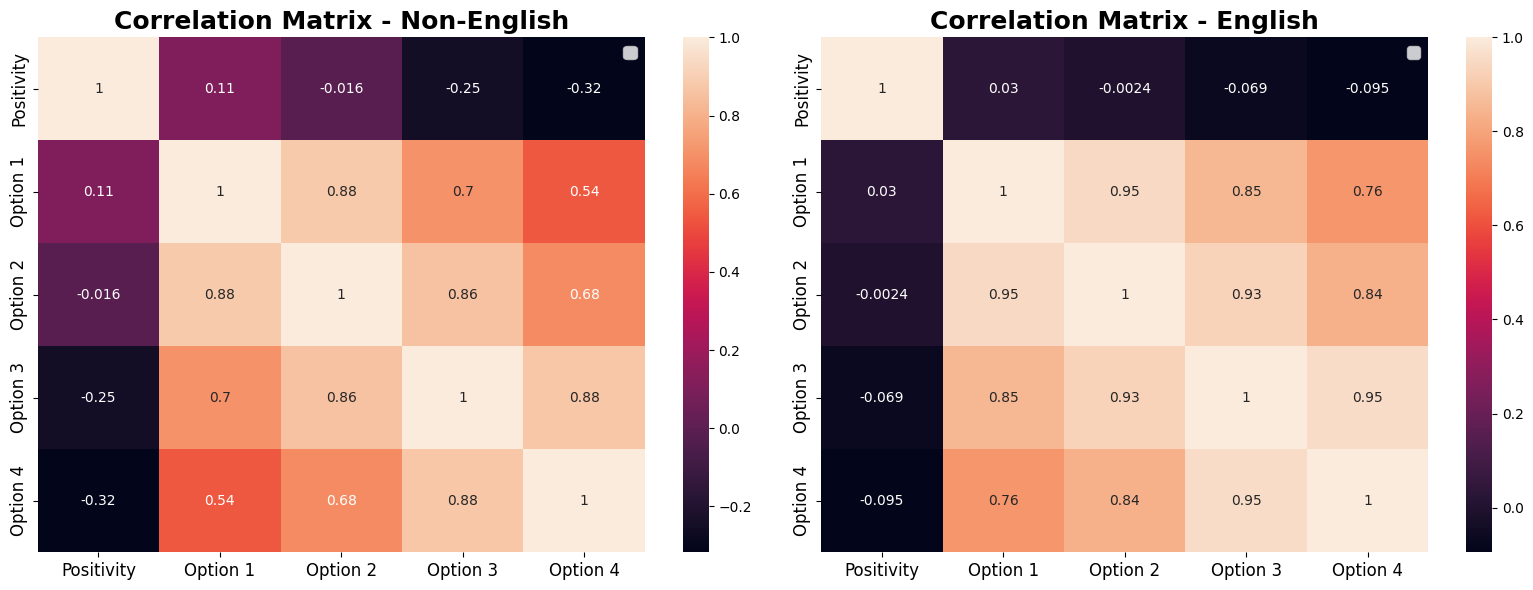

In [127]:
# Create a figure with a grid of 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # Adjust figsize as needed

# Plot 1: Actual vs Predicted for Training Data
sns.heatmap(ne_new.corr(), annot=True, ax=axes[0])
# axes[0].plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', label='Ideal Fit')
# axes[0].set_xlabel('Actual Values', fontsize=15)
# axes[0].set_ylabel('Predicted Values', fontsize=15)
# axes[0].set_yticks(fontsize=15)
# axes[0].set_xticks(fontsize=15)
axes[0].tick_params(axis='both', labelsize=12)
axes[0].set_title('Correlation Matrix - Non-English', fontsize=18, weight='bold')
axes[0].legend(fontsize=12)
# axes[0].grid(True)

# Plot 1: Actual vs Predicted for Training Data
sns.heatmap(e_new.corr(), annot=True, ax=axes[1])
# axes[1].plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', label='Ideal Fit')
# axes[1].set_xlabel('Actual Values', fontsize=15)
# axes[1].set_ylabel('Predicted Values', fontsize=15)
# axes[1].set_yticks(fontsize=15)
# axes[1].set_xticks(fontsize=15)
axes[1].tick_params(axis='both', labelsize=12)
axes[1].set_title('Correlation Matrix - English', fontsize=18, weight='bold')
axes[1].legend(fontsize=12)
# axes[1].grid(True)

# Plot 1: Actual vs Predicted for Training Data
# sns.heatmap(uk_new.corr(), annot=True, ax=axes[2])
# # axes[1].plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', label='Ideal Fit')
# # axes[1].set_xlabel('Actual Values', fontsize=15)
# # axes[1].set_ylabel('Predicted Values', fontsize=15)
# # axes[1].set_yticks(fontsize=15)
# # axes[1].set_xticks(fontsize=15)
# axes[2].tick_params(axis='both', labelsize=12)
# axes[2].set_title('Correlation Matrix - UK', fontsize=18, weight='bold')
# axes[2].legend(fontsize=12)
# axes[1].grid(True)

# Adjust the layout
plt.tight_layout()

# Show the combined plot
plt.show()

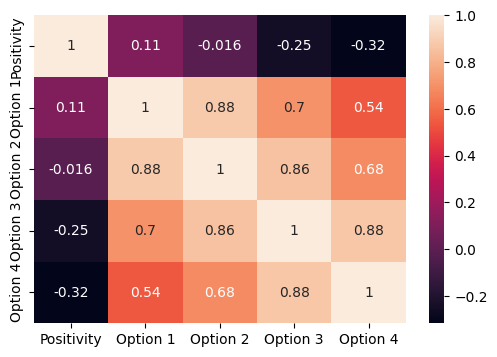

In [96]:
plt.figure(figsize=(6, 4))
sns.heatmap(ne_new.corr(), annot=True)
plt.show()

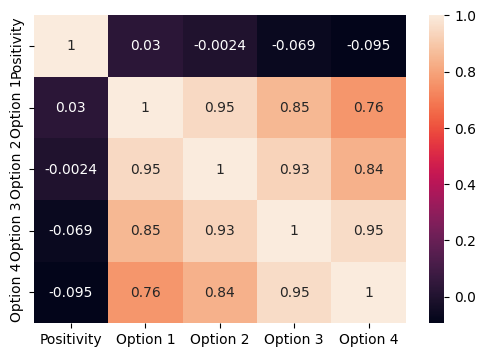

In [97]:
plt.figure(figsize=(6, 4))
sns.heatmap(e_new.corr(), annot=True)
plt.show()

In [35]:
not_english_df.describe()

,Responses,Population,Option 1,Option 2,Option 3,Option 4,Option 5,Positivity,Response Rate,index1
count,78111.000000,78111.000000,78111.000000,78111.000000,78111.000000,78111.000000,2893.000000,78111.000000,78111.000000,78111.000000
mean,62.804976,87.845282,20.165060,29.617674,10.057938,2.881660,2.199758,80.218457,75.111199,228019.812997
std,103.710336,148.600095,34.026691,50.202471,19.569777,6.983716,5.058553,13.619577,10.334023,132474.982776
min,0.900000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,25936.000000
25%,16.000000,22.000000,4.820000,7.000000,1.950000,0.000000,0.000000,73.100000,68.200000,45567.500000
50%,30.100000,42.000000,10.000000,14.000000,4.000000,1.000000,1.000000,82.400000,75.000000,292547.000000
75%,66.000000,92.000000,21.680000,31.500000,10.500000,3.000000,2.000000,90.000000,82.400000,337341.500000
max,1622.000000,2173.000000,713.000000,1022.000000,583.000000,249.000000,75.500000,100.000000,100.000000,384191.000000


In [36]:
english_df.describe()

,Responses,Population,Option 1,Option 2,Option 3,Option 4,Option 5,Positivity,Response Rate,index1
count,294732.000000,294732.000000,294732.000000,294732.000000,294732.000000,294732.000000,0.0,294732.000000,294732.000000,294732.000000
mean,101.525687,143.726328,33.049193,48.129689,15.927249,4.416787,NaN,80.481600,75.873507,193331.026841
std,521.800906,759.200124,173.624623,249.964346,87.474399,26.614948,NaN,13.555456,10.629344,100301.464664
min,0.100000,0.200000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,50.000000,12949.000000
25%,15.000000,20.000000,4.500000,6.990000,1.500000,0.000000,NaN,73.300000,68.600000,108441.750000
50%,29.500000,40.000000,9.000000,14.000000,4.000000,1.000000,NaN,82.700000,75.600000,189620.500000
75%,66.000000,91.700000,21.000000,32.000000,10.300000,3.000000,NaN,90.100000,83.300000,271502.250000
max,13919.600000,21553.200000,6598.850000,8960.950000,4481.550000,1522.890000,NaN,100.000000,100.000000,388781.000000
